In [1]:
import psycopg2 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# DATA IMPORTS use skiprows, requires manual step of counting how many rows in excel need to be skipped
# use of error_bad_lines=False leads to crashes
#ZION_PRECIP, precipitation data from Zion
#CANYLAN_PRECIP, precipitation data from Canyonlands
#ZION_PRECIP = pd.read_csv('ZIONPrecip.csv', skiprows=10)
#I Looked at the data in excel to see how many rows to skip
CANYLAN_PRECIP = pd.read_csv('CANYONLANDSPrecip.csv', skiprows=10)
ZION_PRECIP = pd.read_csv('ZIONPrecip.csv', skiprows=9)
ZION_TEMP = pd.read_csv('ZIONTEMP.csv', skiprows=10)
CANYLAN_TEMP = pd.read_csv('CANYONLANDSTemp.csv', skiprows=10)

#IMPORT TRAFFIC DATA
CL_TRAFFICCOUNTS = pd.read_csv('Canyonlands_Traffic_Counts.csv', skiprows=3)
ZN_TRAFFICCOUNTS = pd.read_csv('Zion_Traffic_Counts.csv', skiprows=3)

#IMPORT ANUAL DATA
CL_VISITS = pd.read_csv('CanlandsAnnual Park Recreation Visitation (1904 - Last Calendar Year)a.csv', skiprows=3)
ZN_VISITS = pd.read_csv('Annual Park Recreation Visitation (1904 - Last Calendar Year).csv', skiprows=3)


# IMPPORTS OF STATE PARK DATA
STATE_PARK_VISITATION_FY18 = pd.read_excel('FY18-Visitation-Periods-1-12.xlsx')
STATE_PARK_VISITATION_FY19 = pd.read_csv('FY19-Visitation-Final.csv')
STATE_PARK_VISITATION_FY20 = pd.read_csv('FY20-Year-End.csv')
STATE_PARK_VISITATION_FY21 = pd.read_csv('Visitation-FY21 (1).csv')
ZN_TRAFFICCOUNTS.head(30)

,GroupDescription,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,TRAFFIC COUNT AT CANYON DRIVE,2021,0,0,0,0,0,0,0,0,0,0,0,NaN
1,TRAFFIC COUNT AT CANYON DRIVE,2020,0,0,0,0,0,0,0,0,0,0,0,0
2,TRAFFIC COUNT AT CANYON DRIVE,2019,0,0,0,0,0,0,0,0,0,0,0,0
3,TRAFFIC COUNT AT CANYON DRIVE,2018,0,0,0,0,0,0,0,0,0,0,0,0
4,TRAFFIC COUNT AT CANYON DRIVE,2017,"15,604","18,652","21,695","13,222",0,0,0,0,0,0,0,0
5,TRAFFIC COUNT AT CANYON DRIVE,2016,0,0,0,0,0,0,0,0,0,0,0,0
6,TRAFFIC COUNT AT CANYON DRIVE,2015,0,0,0,0,0,0,0,0,0,0,0,0
7,TRAFFIC COUNT AT CANYON DRIVE,2014,0,0,0,0,0,0,0,0,0,0,0,0
8,TRAFFIC COUNT AT CANYON DRIVE,2013,0,0,0,0,0,0,0,0,0,0,0,0
9,TRAFFIC COUNT AT CANYON DRIVE,2012,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf


#HERE I DON'T HAVE AN AWS ACCOUNT ANYMORE SO LETS PRETEND OK? 
# Create a SparkSession object
spark = SparkSession.builder.appName('pyspark-demo').getOrCreate()
def write_all_to_mysql(endpoints_dict, port, database_name, username, password):
    dataframes = {
        'CANYLAN_PRECIP': CANYLAN_PRECIP,
        'ZION_PRECIP': ZION_PRECIP,
        'ZION_TEMP': ZION_TEMP,
        'CANYLAN_TEMP': CANYLAN_TEMP,
        'CL_TRAFFICCOUNTS': CL_TRAFFICCOUNTS,
        'ZN_TRAFFICCOUNTS': ZN_TRAFFICCOUNTS,
        'CL_VISITS': CL_VISITS,
        'ZN_VISITS': ZN_VISITS,
        'STATE_PARK_VISITATION_FY18': STATE_PARK_VISITATION_FY18,
        'STATE_PARK_VISITATION_FY19': STATE_PARK_VISITATION_FY19,
        'STATE_PARK_VISITATION_FY20': STATE_PARK_VISITATION_FY20,
        'STATE_PARK_VISITATION_FY21': STATE_PARK_VISITATION_FY21
    }

    for table_name, dataframe in dataframes.items():
        endpoint = endpoints_dict[table_name]
        dataframe = spark.createDataFrame(dataframe)
        write_to_mysql(dataframe, endpoint, port, database_name, table_name, username, password)

def write_to_mysql(dataframe, endpoint, port, database_name, table_name, username, password, write_mode='append'):
    dataframe.write.format('jdbc').options(
        url=f'jdbc:mysql://{endpoint}:{port}/{database_name}',
        driver='com.mysql.jdbc.Driver',
        dbtable=table_name,
        user=username,
        password=password).mode(write_mode).save()
    
endpoints_dict = {
    'CANYLAN_PRECIP': '<CANYLAN_PRECIP endpoint>',
    'ZION_PRECIP': '<ZION_PRECIP endpoint>',
    'ZION_TEMP': '<ZION_TEMP endpoint>',
    'CANYLAN_TEMP': '<CANYLAN_TEMP endpoint>',
    'CL_TRAFFICCOUNTS': '<CL_TRAFFICCOUNTS endpoint>',
    'ZN_TRAFFICCOUNTS': '<ZN_TRAFFICCOUNTS endpoint>',
    'CL_VISITS': '<CL_VISITS endpoint>',
    'ZN_VISITS': '<ZN_VISITS endpoint>',
    'STATE_PARK_VISITATION_FY18': '<STATE_PARK_VISITATION_FY18 endpoint>',
    'STATE_PARK_VISITATION_FY19': '<STATE_PARK_VISITATION_FY19 endpoint>',
    'STATE_PARK_VISITATION_FY20': '<STATE_PARK_VISITATION_FY20 endpoint>',
    'STATE_PARK_VISITATION_FY21': '<STATE_PARK_VISITATION_FY21 endpoint>'
    }

port = '<port>'
database_name = '<database_name>'
username = '<username>'
password = '<password>'

write_all_to_mysql(endpoints_dict, port, database_name, username, password)


In [3]:
#Inspect Data for Zion Precipitation
ZION_PRECIP.head()

,ABBR,PAR,DATE,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,...,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,ZION-DW,RNF_MM_HR,1/1/2004 0:00,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,ZION-DW,RNF_MM_HR,1/2/2004 0:00,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,ZION-DW,RNF_MM_HR,1/3/2004 0:00,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,ZION-DW,RNF_MM_HR,1/4/2004 0:00,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,ZION-DW,RNF_MM_HR,1/5/2004 0:00,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
#CONVERT TO DT for temp
ZION_TEMP['DATE'] = pd.to_datetime(ZION_TEMP['DATE'], utc= True)

CANYLAN_TEMP['DATE_TIME'] = pd.to_datetime(CANYLAN_TEMP['DATE_TIME'], utc= True)


In [5]:
#CONVERT TO DT for precip
ZION_PRECIP['DATE'] = pd.to_datetime(ZION_PRECIP['DATE'], utc= True)

CANYLAN_PRECIP['DATE_TIME'] = pd.to_datetime(CANYLAN_PRECIP['DATE_TIME'], utc= True)
ZION_PRECIP.head()

,ABBR,PAR,DATE,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,...,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,ZION-DW,RNF_MM_HR,2004-01-01 00:00:00+00:00,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,ZION-DW,RNF_MM_HR,2004-01-02 00:00:00+00:00,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,ZION-DW,RNF_MM_HR,2004-01-03 00:00:00+00:00,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,ZION-DW,RNF_MM_HR,2004-01-04 00:00:00+00:00,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,ZION-DW,RNF_MM_HR,2004-01-05 00:00:00+00:00,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [6]:
#Replace -999 in 4 data sets
ZION_TEMP.replace(-999, np.nan, inplace=True)
CANYLAN_TEMP['STP_DEGC'].replace(-999, np.nan, inplace=True)
ZION_PRECIP.replace(-999, np.nan, inplace=True)
CANYLAN_PRECIP['RNF_MM_HR'].replace(-999, np.nan, inplace=True)

#See if ther are any NaN in data set
ZP_NA_Count = ZION_PRECIP.isna().sum()
ZT_NA_Count = ZION_TEMP.isna().sum()
CLP_NA_Count = CANYLAN_PRECIP.isna().sum()
CLT_NA_Count = CANYLAN_TEMP.isna().sum()

# Look at counts to compare sizes
print(ZP_NA_Count)
print(ZT_NA_Count)
print(CLP_NA_Count)
print(CLT_NA_Count)

ABBR         0
PAR          0
DATE         0
HOUR_0     226
HOUR_1     225
HOUR_2     224
HOUR_3     225
HOUR_4     224
HOUR_5     225
HOUR_6     230
HOUR_7     267
HOUR_8     332
HOUR_9     357
HOUR_10    338
HOUR_11    283
HOUR_12    260
HOUR_13    260
HOUR_14    264
HOUR_15    246
HOUR_16    238
HOUR_17    230
HOUR_18    227
HOUR_19    224
HOUR_20    220
HOUR_21    222
HOUR_22    222
HOUR_23    220
dtype: int64
ABBR              0
PAR               0
DATE              0
HOUR_0           46
HOUR_1           45
HOUR_2           45
HOUR_3           46
HOUR_4           45
HOUR_5           46
HOUR_6           46
HOUR_7           50
HOUR_8           51
HOUR_9           53
HOUR_10          47
HOUR_11          44
HOUR_12          41
HOUR_13          42
HOUR_14          43
HOUR_15          49
HOUR_16          44
HOUR_17          44
HOUR_18          41
HOUR_19          44
HOUR_20          43
HOUR_21          45
HOUR_22          45
HOUR_23          43
Unnamed: 27    6210
dtype: int64
ABBR     

In [7]:
# On Zion data get average of months to match up with CanyonLands data
ZION_TEMP['STP_DEGC'] = ZION_TEMP.iloc[:,3:23].mean(axis=1)
ZION_PRECIP['RNF_MM_HR'] = ZION_PRECIP.iloc[:,3:23].mean(axis=1)

In [8]:
#Temprature Data
print('og data\n')
print('Zion Temp:', ZION_TEMP.shape, '\n')
print('CanLan Temp:', CANYLAN_TEMP.shape, '\n')

ZION_TEMP_D = ZION_TEMP[ZION_TEMP['STP_DEGC'].notna()]
CANYLAN_TEMP_D = CANYLAN_TEMP[CANYLAN_TEMP['STP_DEGC'].notna()]
print('after NA drop\n')
print('Zion Temp:', ZION_TEMP_D.shape, '\n')
print('CanLan Temp:', CANYLAN_TEMP_D.shape, '\n')
ZION_TEMP_D.head()

og data

Zion Temp: (6210, 29) 

CanLan Temp: (184104, 6) 

after NA drop

Zion Temp: (6181, 29) 

CanLan Temp: (183265, 6) 



,ABBR,PAR,DATE,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,...,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23,Unnamed: 27,STP_DEGC
11,ZION-DW,STP_DEGC,2004-01-12 00:00:00+00:00,20.0,20.0,20.0,19.0,19.0,19.0,18.0,...,27.0,25.0,23.0,22.0,21.0,21.0,20.0,20.0,NaN,22.70
12,ZION-DW,STP_DEGC,2004-01-13 00:00:00+00:00,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,26.0,25.0,24.0,23.0,23.0,23.0,22.0,22.0,NaN,23.50
13,ZION-DW,STP_DEGC,2004-01-14 00:00:00+00:00,22.0,22.0,22.0,22.0,22.0,22.0,22.0,...,23.0,23.0,23.0,23.0,22.0,22.0,22.0,22.0,NaN,22.85
14,ZION-DW,STP_DEGC,2004-01-15 00:00:00+00:00,22.0,22.0,23.0,23.0,22.0,22.0,22.0,...,23.0,23.0,23.0,23.0,22.0,22.0,22.0,22.0,NaN,23.10
15,ZION-DW,STP_DEGC,2004-01-16 00:00:00+00:00,22.0,22.0,22.0,22.0,22.0,22.0,22.0,...,23.0,23.0,22.0,22.0,22.0,22.0,22.0,22.0,NaN,22.95


In [9]:
#RainFall Data
print('og data\n')
print('Zion Precip:', ZION_PRECIP.shape, '\n')
print('CanLan Precip:', CANYLAN_PRECIP.shape, '\n')

ZION_PRECIP_D = ZION_PRECIP[ZION_PRECIP['RNF_MM_HR'].notna()]
CANYLAN_PRECIP_D = CANYLAN_PRECIP[CANYLAN_PRECIP['RNF_MM_HR'].notna()]
ZION_TEMP_D = ZION_TEMP_D.rename(columns={'DATE': 'DATE_TIME'})
print('Zion Temp:', ZION_TEMP_D.shape, '\n')
print('CanLan Temp:', CANYLAN_TEMP_D.shape, '\n')

og data

Zion Precip: (6210, 28) 

CanLan Precip: (184104, 5) 

Zion Temp: (6181, 29) 

CanLan Temp: (183265, 6) 



In [10]:
#Add Year and Month to TEMP Data 
ZION_TEMP_D = ZION_TEMP_D[['ABBR', 'STP_DEGC', "DATE_TIME"]]

ZION_TEMP_D.head()

CANYLAN_TEMP_D = CANYLAN_TEMP_D[['ABBR', 'STP_DEGC', "DATE_TIME"]]

In [11]:
#Add Year and Month to PRECIP Data 
ZION_PRECIP_D = ZION_PRECIP_D[['ABBR', 'RNF_MM_HR', "DATE"]]
ZION_PRECIP_D = ZION_PRECIP_D.rename(columns={'DATE': 'DATE_TIME'})
ZION_PRECIP_D.head()

CANYLAN_PRECIP_D = CANYLAN_PRECIP_D[['ABBR', 'RNF_MM_HR', "DATE_TIME"]]
CANYLAN_PRECIP_D.head()

,ABBR,RNF_MM_HR,DATE_TIME
0,CANY-IS,0.0,2000-01-01 00:00:00+00:00
1,CANY-IS,0.0,2000-01-01 01:00:00+00:00
2,CANY-IS,0.0,2000-01-01 02:00:00+00:00
3,CANY-IS,0.0,2000-01-01 03:00:00+00:00
4,CANY-IS,0.0,2000-01-01 04:00:00+00:00


In [12]:
ZION_TEMP_D.head()

,ABBR,STP_DEGC,DATE_TIME
11,ZION-DW,22.70,2004-01-12 00:00:00+00:00
12,ZION-DW,23.50,2004-01-13 00:00:00+00:00
13,ZION-DW,22.85,2004-01-14 00:00:00+00:00
14,ZION-DW,23.10,2004-01-15 00:00:00+00:00
15,ZION-DW,22.95,2004-01-16 00:00:00+00:00


In [13]:
ZOIN_CANLANPRECIP_NORMAL = pd.concat([ZION_PRECIP_D, CANYLAN_PRECIP_D], ignore_index=True)
ZOIN_CANLANPRECIP_NORMAL.head()

,ABBR,RNF_MM_HR,DATE_TIME
0,ZION-DW,0.0,2004-01-12 00:00:00+00:00
1,ZION-DW,0.0,2004-01-13 00:00:00+00:00
2,ZION-DW,0.0,2004-01-14 00:00:00+00:00
3,ZION-DW,0.0,2004-01-15 00:00:00+00:00
4,ZION-DW,0.0,2004-01-16 00:00:00+00:00


In [14]:
ZOIN_CANLANTEMP_NORMAL = pd.concat([ZION_TEMP_D, CANYLAN_TEMP_D], ignore_index=True)
ZOIN_CANLANTEMP_NORMAL.head()

,ABBR,STP_DEGC,DATE_TIME
0,ZION-DW,22.70,2004-01-12 00:00:00+00:00
1,ZION-DW,23.50,2004-01-13 00:00:00+00:00
2,ZION-DW,22.85,2004-01-14 00:00:00+00:00
3,ZION-DW,23.10,2004-01-15 00:00:00+00:00
4,ZION-DW,22.95,2004-01-16 00:00:00+00:00


In [15]:
df_park_key = pd.DataFrame({
    'park_name': ['ZION-DW', 'CANY-IS'],
    'key': [1, 2]
})
ZOIN_CANLANPRECIP_NORMAL['ABBR'] = ZOIN_CANLANPRECIP_NORMAL['ABBR'].map(df_park_key.set_index('park_name')['key'])
ZOIN_CANLANTEMP_NORMAL['ABBR'] = ZOIN_CANLANTEMP_NORMAL['ABBR'].map(df_park_key.set_index('park_name')['key'])

In [16]:
park_weather = pd.merge(ZOIN_CANLANPRECIP_NORMAL, ZOIN_CANLANTEMP_NORMAL, on=['ABBR', 'DATE_TIME'], how='left')
park_weather.head()

,ABBR,RNF_MM_HR,DATE_TIME,STP_DEGC
0,1,0.0,2004-01-12 00:00:00+00:00,22.70
1,1,0.0,2004-01-13 00:00:00+00:00,23.50
2,1,0.0,2004-01-14 00:00:00+00:00,22.85
3,1,0.0,2004-01-15 00:00:00+00:00,23.10
4,1,0.0,2004-01-16 00:00:00+00:00,22.95


In [17]:
park_weather.insert(0, 'ID', range(1, len(park_weather)+1))
park_weather = park_weather[['ID', 'ABBR', 'DATE_TIME','RNF_MM_HR',  'STP_DEGC']]


In [18]:
park_weather.head()

,ID,ABBR,DATE_TIME,RNF_MM_HR,STP_DEGC
0,1,1,2004-01-12 00:00:00+00:00,0.0,22.70
1,2,1,2004-01-13 00:00:00+00:00,0.0,23.50
2,3,1,2004-01-14 00:00:00+00:00,0.0,22.85
3,4,1,2004-01-15 00:00:00+00:00,0.0,23.10
4,5,1,2004-01-16 00:00:00+00:00,0.0,22.95


In [ ]:
#bring data to aws 
write_to_mysql(park_weather, endpoint, port, database_name, 'park_weather', username, password)
write_to_mysql(park_key, endpoint, port, database_name, 'park_key', username, password)

In [19]:
ZION_TEMP_D['Year'] = ZION_TEMP_D['DATE_TIME'].dt.year
ZION_TEMP_D['Month'] = ZION_TEMP_D['DATE_TIME'].dt.month

In [20]:
ZION_TEMP_D.head()

,ABBR,STP_DEGC,DATE_TIME,Year,Month
11,ZION-DW,22.70,2004-01-12 00:00:00+00:00,2004,1
12,ZION-DW,23.50,2004-01-13 00:00:00+00:00,2004,1
13,ZION-DW,22.85,2004-01-14 00:00:00+00:00,2004,1
14,ZION-DW,23.10,2004-01-15 00:00:00+00:00,2004,1
15,ZION-DW,22.95,2004-01-16 00:00:00+00:00,2004,1


In [21]:
#Condense Zion Temp data and get average
ZION_TEMP_AVGT = ZION_TEMP_D.groupby(['ABBR','Year', 'Month']).mean('STP_DEGC')
ZION_TEMP_AVGT.head()


STP_DEGC
ABBR    Year Month           
ZION-DW 2004 1      25.340000
             2      24.363793
             3      25.350000
             4      26.228889
             5      24.314516

In [22]:
ZION_PRECIP_D['Year'] = ZION_PRECIP_D['DATE_TIME'].dt.year
ZION_PRECIP_D['Month'] = ZION_PRECIP_D['DATE_TIME'].dt.month
ZION_PRECIP_D.head()

CANYLAN_TEMP_D['Year'] = CANYLAN_TEMP_D['DATE_TIME'].dt.year
CANYLAN_TEMP_D['Month'] = CANYLAN_TEMP_D['DATE_TIME'].dt.month
CANYLAN_TEMP_D.head()

CANYLAN_PRECIP_D['Year'] = CANYLAN_PRECIP_D['DATE_TIME'].dt.year
CANYLAN_PRECIP_D['Month'] = CANYLAN_PRECIP_D['DATE_TIME'].dt.month

In [23]:
#Condense Precip Temp data and get average
ZION_PRECIP_AVGT = ZION_PRECIP_D.groupby(['ABBR','Year', 'Month']).mean('RNF_MM_HR')
ZION_PRECIP_AVGT.head()

RNF_MM_HR
ABBR    Year Month           
ZION-DW 2004 1       0.000000
             2       0.060627
             3       0.000000
             4       0.050000
             5       0.000000

In [24]:
#Rename Columns so they are easier to interpret
ZION_TEMP_AVGT = ZION_TEMP_AVGT.rename(columns={'STP_DEGC': 'Zion_Avg_Temp'})
ZION_PRECIP_AVGT = ZION_PRECIP_AVGT.rename(columns={'RNF_MM_HR': 'Zion_Avg_Rainfall'})

In [25]:
#Condense Canyonlands Temp data and get average
CANYLAN_TEMP_AVGT = CANYLAN_TEMP_D.groupby(['ABBR','Year', 'Month']).mean('STP_DEGC')
CANYLAN_TEMP_AVGT.head()

STP_DEGC
ABBR    Year Month           
CANY-IS 2000 1      24.817473
             2      24.570791
             3      24.448790
             4      25.010345
             5      25.296505

In [26]:
#Condense Canyonlands Rainfall data and get average
CANYLAN_PRECIP_AVGT = CANYLAN_PRECIP_D.groupby(['ABBR','Year', 'Month']).mean('RNF_MM_HR')
CANYLAN_PRECIP_AVGT.head()

RNF_MM_HR
ABBR    Year Month           
CANY-IS 2000 1       0.022446
             2       0.013381
             3       0.033871
             4       0.033750
             5       0.022849

In [27]:
#Rename Columns so they are easier to interpret
ZION_TEMP_AVGT = ZION_TEMP_AVGT.rename(columns={'STP_DEGC': 'Zion_Avg_Temp'})
ZION_PRECIP_AVGT = ZION_PRECIP_AVGT.rename(columns={'RNF_MM_HR': 'Zion_Avg_Rainfall'})


CANYLAN_TEMP_AVGT = CANYLAN_TEMP_AVGT.rename(columns={'STP_DEGC': 'CanyonLands_Avg_Temp'})
CANYLAN_PRECIP_AVGT = CANYLAN_PRECIP_AVGT.rename(columns={'RNF_MM_HR': 'CanyonLands_Avg_Rainfall'})
ZION_PRECIP_AVGT.head()

Zion_Avg_Rainfall
ABBR    Year Month                   
ZION-DW 2004 1               0.000000
             2               0.060627
             3               0.000000
             4               0.050000
             5               0.000000

In [28]:
#Merge Zion Temprature and Rainfall
COMBINED_ZION_T_R = pd.merge(ZION_TEMP_AVGT, ZION_PRECIP_AVGT, on = ['Year', 'Month'])
COMBINED_ZION_T_R.head()

Zion_Avg_Temp  Zion_Avg_Rainfall
Year Month                                  
2004 1          25.340000           0.000000
     2          24.363793           0.060627
     3          25.350000           0.000000
     4          26.228889           0.050000
     5          24.314516           0.000000

In [29]:
#Merge Canyonlands Temprature and Rainfall
COMBINED_CANYLAN_T_R = pd.merge(CANYLAN_TEMP_AVGT, CANYLAN_PRECIP_AVGT, on = ['Year', 'Month'])
COMBINED_CANYLAN_T_R.head()



CanyonLands_Avg_Temp  CanyonLands_Avg_Rainfall
Year Month                                                
2000 1                 24.817473                  0.022446
     2                 24.570791                  0.013381
     3                 24.448790                  0.033871
     4                 25.010345                  0.033750
     5                 25.296505                  0.022849

In [30]:
#Merge Canyonlands/Zion Temprature and Rainfall data
COMBINED_Monthly_T_RF = pd.merge(COMBINED_ZION_T_R, COMBINED_CANYLAN_T_R, on = ['Year', 'Month'], how = 'right').reset_index()
COMBINED_Monthly_T_RF.tail()

,Year,Month,Zion_Avg_Temp,Zion_Avg_Rainfall,CanyonLands_Avg_Temp,CanyonLands_Avg_Rainfall
247,2020,8,26.861290,0.011290,23.522402,0.002846
248,2020,9,25.261930,0.000000,28.634965,0.004507
249,2020,10,23.979032,0.000000,24.865188,0.019946
250,2020,11,22.453333,0.005000,23.918333,0.008647
251,2020,12,21.001613,0.003226,24.343952,0.015520


In [31]:
#Create Yearly breakdown instead of monthly
COMBINED_Yearly_T_RF = COMBINED_Monthly_T_RF.drop(['Month'], axis=1)
COMBINED_Yearly_T_RF = COMBINED_Yearly_T_RF.groupby(["Year"]).mean().reset_index()
COMBINED_Yearly_T_RF.head(10)

,Year,Zion_Avg_Temp,Zion_Avg_Rainfall,CanyonLands_Avg_Temp,CanyonLands_Avg_Rainfall
0,2000,NaN,NaN,24.267578,0.026902
1,2001,NaN,NaN,24.704246,0.035060
2,2002,NaN,NaN,24.870720,0.030330
3,2003,NaN,NaN,25.903499,0.031826
4,2004,24.562156,0.026146,25.741195,0.034138
5,2005,24.689650,0.032967,24.152955,0.039063
6,2006,24.757610,0.023523,24.122132,0.033382
7,2007,25.743843,0.027321,23.709922,0.041688
8,2008,24.652583,0.024426,24.757901,0.048555
9,2009,24.247324,0.009301,24.926082,0.032804


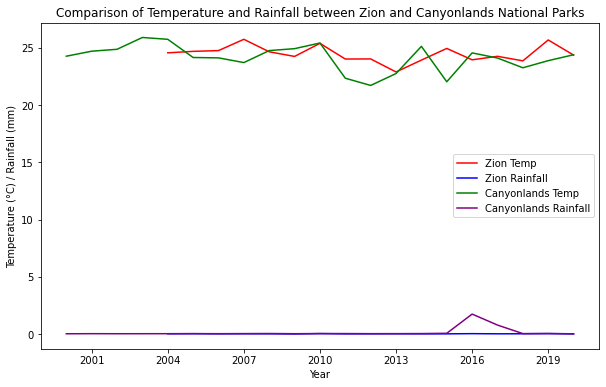

In [32]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# plot Zion's average temperature and rainfall as lines
ax.plot(COMBINED_Yearly_T_RF['Year'], COMBINED_Yearly_T_RF['Zion_Avg_Temp'], color='red', label='Zion Temp')
ax.plot(COMBINED_Yearly_T_RF['Year'], COMBINED_Yearly_T_RF['Zion_Avg_Rainfall'], color='blue', label='Zion Rainfall')

# plot Canyonlands' average temperature and rainfall as lines
ax.plot(COMBINED_Yearly_T_RF['Year'], COMBINED_Yearly_T_RF['CanyonLands_Avg_Temp'], color='green', label='Canyonlands Temp')
ax.plot(COMBINED_Yearly_T_RF['Year'], COMBINED_Yearly_T_RF['CanyonLands_Avg_Rainfall'], color='purple', label='Canyonlands Rainfall')

# set axis labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C) / Rainfall (mm)')
ax.set_title('Comparison of Temperature and Rainfall between Zion and Canyonlands National Parks')
ax.legend()

# remove the decimal place in the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# display the plot
plt.show()

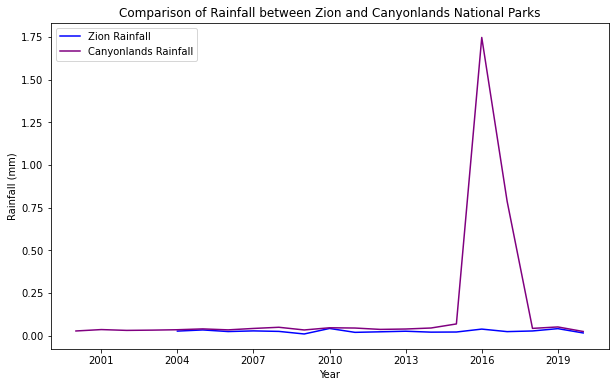

In [33]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# plot Canyonlands' average temperature and rainfall as lines
ax.plot(COMBINED_Yearly_T_RF['Year'], COMBINED_Yearly_T_RF['Zion_Avg_Rainfall'], color='blue', label='Zion Rainfall')
ax.plot(COMBINED_Yearly_T_RF['Year'], COMBINED_Yearly_T_RF['CanyonLands_Avg_Rainfall'], color='purple', label='Canyonlands Rainfall')

# set axis labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall (mm)')
ax.set_title('Comparison of Rainfall between Zion and Canyonlands National Parks')
ax.legend()

# remove the decimal place in the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# display the plot
plt.show()

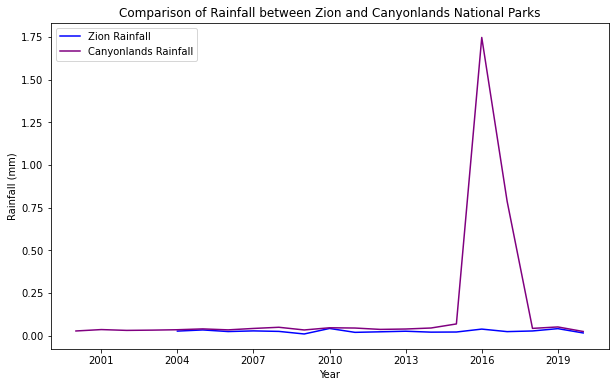

In [34]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Canyonlands' average temperature and rainfall as lines
ax.plot(COMBINED_Yearly_T_RF['Year'], COMBINED_Yearly_T_RF['Zion_Avg_Rainfall'], color='blue', label='Zion Rainfall')
ax.plot(COMBINED_Yearly_T_RF['Year'], COMBINED_Yearly_T_RF['CanyonLands_Avg_Rainfall'], color='purple', label='Canyonlands Rainfall')

# Set axis labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall (mm)')
ax.set_title('Comparison of Rainfall between Zion and Canyonlands National Parks')
ax.legend()

# Remove the decimal place in the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Save the plot with a lower DPI
plt.savefig('myplot.png', dpi=150)

# Display the plot
plt.show()

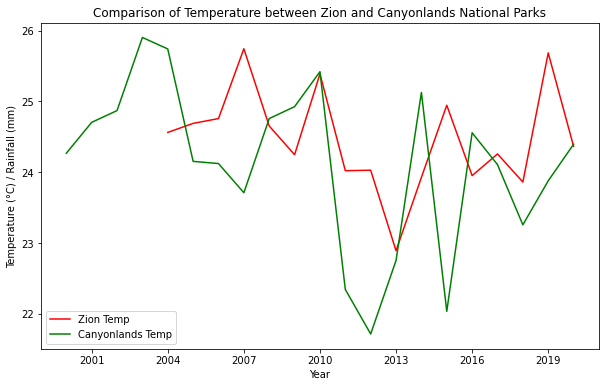

In [35]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# plot Zion's average temperature and rainfall as lines
ax.plot(COMBINED_Yearly_T_RF['Year'], COMBINED_Yearly_T_RF['Zion_Avg_Temp'], color='red', label='Zion Temp')

# plot Canyonlands' average temperature and rainfall as lines
ax.plot(COMBINED_Yearly_T_RF['Year'], COMBINED_Yearly_T_RF['CanyonLands_Avg_Temp'], color='green', label='Canyonlands Temp')

# remove the decimal place in the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# set axis labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C) / Rainfall (mm)')
ax.set_title('Comparison of Temperature between Zion and Canyonlands National Parks')
ax.legend()

# display the plot
plt.show()

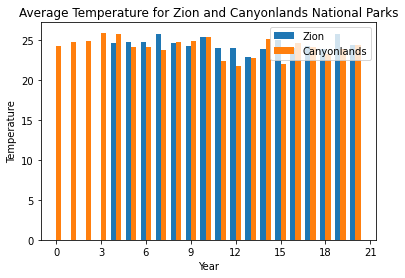

In [36]:
# create a list of years from the data
years = list(COMBINED_Yearly_T_RF['Year'])

# create a list of average temperatures for each park
zion_temps = list(COMBINED_Yearly_T_RF['Zion_Avg_Temp'])
canyon_temps = list(COMBINED_Yearly_T_RF['CanyonLands_Avg_Temp'])

# set the width of the bars
bar_width = 0.35

# set the x positions of the bars
zion_x = [i - bar_width/2 for i in range(len(years))]
canyon_x = [i + bar_width/2 for i in range(len(years))]

# create the figure and axes
fig, ax = plt.subplots()

# plot the temperature bars
ax.bar(zion_x, zion_temps, width=bar_width, label='Zion')
ax.bar(canyon_x, canyon_temps, width=bar_width, label='Canyonlands')

# set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_title('Average Temperature for Zion and Canyonlands National Parks')

# remove the decimal place in the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# add the legend
ax.legend()

# display the plot
plt.show()

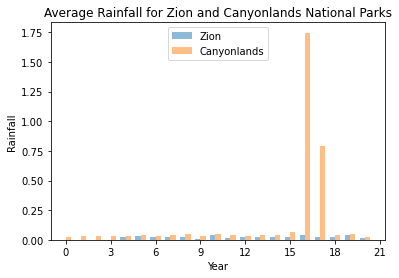

In [37]:
# create a list of years from the data
years = list(COMBINED_Yearly_T_RF['Year'])

# create a list of average rainfall for each park
zion_rain = list(COMBINED_Yearly_T_RF['Zion_Avg_Rainfall'])
canyon_rain = list(COMBINED_Yearly_T_RF['CanyonLands_Avg_Rainfall'])

# set the width of the bars
bar_width = 0.35

# set the x positions of the bars
zion_x = [i - bar_width/2 for i in range(len(years))]
canyon_x = [i + bar_width/2 for i in range(len(years))]

# create the figure and axes
fig, ax = plt.subplots()

# plot the rainfall bars
ax.bar(zion_x, zion_rain, width=bar_width, label='Zion', alpha=0.5)
ax.bar(canyon_x, canyon_rain, width=bar_width, label='Canyonlands', alpha=0.5)

# set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.set_title('Average Rainfall for Zion and Canyonlands National Parks')


# remove the decimal place in the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# add the legend
ax.legend()

# display the plot
plt.show()

In [38]:
#Start Traffic Counts Data

In [39]:
#Drop Group Description as it is a string and unneeded
CL_TRAFFICCOUNTS = CL_TRAFFICCOUNTS.drop(['GroupDescription'], axis=1)
ZN_TRAFFICCOUNTS = ZN_TRAFFICCOUNTS.drop(['GroupDescription'], axis=1)

#Replace NaN with 0
CL_TRAFFICCOUNTS.replace(np.nan, 0, inplace=True)
ZN_TRAFFICCOUNTS.replace(np.nan, 0, inplace=True)
ZN_TRAFFICCOUNTS.head(30)

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,2021,0,0,0,0,0,0,0,0,0,0,0,0
1,2020,0,0,0,0,0,0,0,0,0,0,0,0
2,2019,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,"15,604","18,652","21,695","13,222",0,0,0,0,0,0,0,0
5,2016,0,0,0,0,0,0,0,0,0,0,0,0
6,2015,0,0,0,0,0,0,0,0,0,0,0,0
7,2014,0,0,0,0,0,0,0,0,0,0,0,0
8,2013,0,0,0,0,0,0,0,0,0,0,0,0
9,2012,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# Make sure that year is great than 2000 but less than 2021
CL_TRAFFICCOUNTS = CL_TRAFFICCOUNTS[CL_TRAFFICCOUNTS['Year'] >= 2000]
ZN_TRAFFICCOUNTS = ZN_TRAFFICCOUNTS[ZN_TRAFFICCOUNTS['Year'] >= 2000]
CL_TRAFFICCOUNTS = CL_TRAFFICCOUNTS[CL_TRAFFICCOUNTS['Year'] <= 2020]
ZN_TRAFFICCOUNTS = ZN_TRAFFICCOUNTS[ZN_TRAFFICCOUNTS['Year'] <= 2020]
print(ZN_TRAFFICCOUNTS.dtypes)
#The Data type for this table is objects and they should be integers. Th
print(list(ZN_TRAFFICCOUNTS))
cols = list(ZN_TRAFFICCOUNTS)
def convert_cols_traff(df):
    for i in cols:
        df[i] = df[i].astype('str') 
        df[i] = df[i].str.replace(',', '')
        df[i] = pd.to_numeric(df[i], errors='coerce')
        df[i].dtypes
        
convert_cols_traff(ZN_TRAFFICCOUNTS)
convert_cols_traff(CL_TRAFFICCOUNTS)

Year     int64
JAN     object
FEB     object
MAR     object
APR     object
MAY     object
JUN     object
JUL     object
AUG     object
SEP     object
OCT     object
NOV     object
DEC     object
dtype: object
['Year', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']


In [41]:
#Groupby Year to get yearly totals broken up by month
CL_TRAFFICCOUNTS1 = CL_TRAFFICCOUNTS.groupby(['Year']).sum()
CL_TRAFFICCOUNTS1 = CL_TRAFFICCOUNTS1.reset_index()
CL_TRAFFICCOUNTS1.head()



ZN_TRAFFICCOUNTS1 = ZN_TRAFFICCOUNTS.groupby(['Year']).sum()
ZN_TRAFFICCOUNTS1 = ZN_TRAFFICCOUNTS1.reset_index()
CL_TRAFFICCOUNTS1.head()


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,2000,2171,3036,11567,20710,24315,17684,19062,15717,21528,16974,4838,2467
1,2001,1916,2367,13266,18969,23262,16248,14998,15739,18857,15601,8312,1954
2,2002,1907,3069,12617,17785,24629,17099,13265,14224,22938,17181,5970,2368
3,2003,2330,2411,15519,19071,24173,16103,13359,14616,23559,19359,7974,2541
4,2004,2042,2452,12137,20862,28385,15953,11366,13567,20104,18764,4984,2087


In [42]:
#Change column names to integers so they match better with other data
ZN_TRAFFICCOUNTS1.columns = range(0, 13) 
ZN_TRAFFICCOUNTS1.head()
ZN_TRAFFICCOUNTS1 = ZN_TRAFFICCOUNTS1.rename(columns={0: 'Year'})
CL_TRAFFICCOUNTS1.tail(15)

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
6,2006,2176,2885,11034,18218,23375,16838,20062,15191,22557,15443,6464,2313
7,2007,1590,2857,10746,21227,25145,17175,13885,17090,32458,20726,8971,2086
8,2008,1508,2831,13297,22224,26909,19952,15537,22546,25259,18589,6609,2134
9,2009,1806,2739,12708,18396,27873,24322,16777,18620,23351,20024,6540,1651
10,2010,1434,2085,9654,21683,26392,22402,17032,20037,23676,20487,5079,1801
11,2011,1719,2913,11236,21505,30780,20183,19028,23878,25320,23180,5998,2589
12,2012,2743,3242,13706,23213,27116,19082,18418,19923,25379,19285,8208,2910
13,2013,1751,3298,14714,23010,30329,20458,26666,15521,25454,13886,7638,2517
14,2014,2408,4896,18180,26681,26503,26471,20980,21123,26341,26632,10261,3795
15,2015,2997,5049,19413,30090,37077,28574,25541,28038,32108,28705,10033,4638


In [43]:
#Change column names to integers so they match better with other data
CL_TRAFFICCOUNTS1.columns = range(0, 13) 
CL_TRAFFICCOUNTS1.head()
CL_TRAFFICCOUNTS1 = CL_TRAFFICCOUNTS1.rename(columns={0: 'Year'})


In [44]:
ZN_TRAFFIC_NORMAL = ZN_TRAFFICCOUNTS1.copy()
CL_TRAFFIC_NORMAL = CL_TRAFFICCOUNTS1.copy()

In [45]:
# add 'ABBR' column to ZN_TRAFFICCOUNTS1
ZN_TRAFFIC_NORMAL['ABBR'] = 'ZION-DW'

# add 'ABBR' column to CL_TRAFFICCOUNTS1
CL_TRAFFIC_NORMAL['ABBR'] = 'CANY-IS'

# create a dictionary mapping key values to park names
park_dict = dict(df_park_key[['key', 'park_name']].values)

CL_TRAFFIC_NORMAL.head()

,Year,1,2,3,4,5,6,7,8,9,10,11,12,ABBR
0,2000,2171,3036,11567,20710,24315,17684,19062,15717,21528,16974,4838,2467,CANY-IS
1,2001,1916,2367,13266,18969,23262,16248,14998,15739,18857,15601,8312,1954,CANY-IS
2,2002,1907,3069,12617,17785,24629,17099,13265,14224,22938,17181,5970,2368,CANY-IS
3,2003,2330,2411,15519,19071,24173,16103,13359,14616,23559,19359,7974,2541,CANY-IS
4,2004,2042,2452,12137,20862,28385,15953,11366,13567,20104,18764,4984,2087,CANY-IS


In [46]:
CL_TRAFFIC_NORMAL['ABBR'] = CL_TRAFFIC_NORMAL['ABBR'].map(df_park_key.set_index('park_name')['key'])
ZN_TRAFFIC_NORMAL['ABBR'] = ZN_TRAFFIC_NORMAL['ABBR'].map(df_park_key.set_index('park_name')['key'])


In [47]:
ZN_TRAFFIC_NORMAL.head()

,Year,1,2,3,4,5,6,7,8,9,10,11,12,ABBR
0,2000,53368,53025,77048,128602,145856,112568,114458,112158,99621,84215,45496,24336,1
1,2001,29415,25825,36799,72315,83786,105567,105594,113668,93914,71229,48128,25032,1
2,2002,27164,31660,57616,98871,117060,111369,119801,119036,112987,92189,51147,35725,1
3,2003,33519,34115,54949,83446,120708,104259,98324,103376,101549,91303,54193,35189,1
4,2004,31961,37620,72514,102159,108936,107394,113251,112952,114369,89266,50962,35539,1


In [48]:
#stack data so they are no longer columns and fit better with other data
new_cl_traff = CL_TRAFFICCOUNTS1.set_index(['Year']).stack().reset_index().rename(columns={1 : 'Year', 'level_1' : 'Month', 0: 'Traffic_Counts'})
new_zn_traff = ZN_TRAFFICCOUNTS1.set_index(['Year']).stack().reset_index().rename(columns={1 : 'Year', 'level_1': 'Month', 0 :"Traffic_Counts"})
new_cl_traff.tail(15)

,Year,Month,Traffic_Counts
237,2019,10,33787
238,2019,11,14753
239,2019,12,6412
240,2020,1,4233
241,2020,2,5723
242,2020,3,6437
243,2020,4,0
244,2020,5,2823
245,2020,6,25140
246,2020,7,26486


In [135]:
new_cl_traff['Park'] = 'CanyonLands'
new_zn_traff['Park'] = 'Zion'
# Rename the 'Traffic_Counts' column to 'CanyonLands_Traffic_Counts'
new_cl_traff = new_cl_traff.rename(columns={'Traffic_Counts': 'CanyonLands_Traffic_Counts'})
new_zn_traff = new_zn_traff.rename(columns={'Traffic_Counts': 'Zion_Traffic_Counts'})
new_zn_traff.head()

,Year,Month,Zion_Traffic_Counts,Park
0,2000,1,53368,Zion
1,2000,2,53025,Zion
2,2000,3,77048,Zion
3,2000,4,128602,Zion
4,2000,5,145856,Zion


In [49]:
new_cl_traff_NORMAL = new_cl_traff.copy()
new_zn_traff_NORMAL = new_zn_traff.copy()

In [50]:
# add 'ABBR' column to new_zn_traff_NORMAL
new_zn_traff_NORMAL['ABBR'] = 'ZION-DW'

# add 'ABBR' column to new_cl_traff_NORMAL
new_cl_traff_NORMAL['ABBR'] = 'CANY-IS'

# create a dictionary mapping key values to park names
park_dict = dict(df_park_key[['key', 'park_name']].values)

new_cl_traff_NORMAL.head()

,Year,Month,Traffic_Counts,ABBR
0,2000,1,2171,CANY-IS
1,2000,2,3036,CANY-IS
2,2000,3,11567,CANY-IS
3,2000,4,20710,CANY-IS
4,2000,5,24315,CANY-IS


In [51]:
new_cl_traff_NORMAL['ABBR'] = new_cl_traff_NORMAL['ABBR'].map(df_park_key.set_index('park_name')['key'])
new_zn_traff_NORMAL['ABBR'] = new_zn_traff_NORMAL['ABBR'].map(df_park_key.set_index('park_name')['key'])

In [52]:
normal_traff = pd.concat([new_cl_traff_NORMAL, new_zn_traff_NORMAL], ignore_index=True)
normal_traff.insert(0, 'ID', range(1, 1+len(normal_traff)))

# move the park_key column to the second position
normal_traff = normal_traff[['ID', 'ABBR', 'Year', 'Month','Traffic_Counts']]

normal_traff.head()

,ID,ABBR,Year,Month,Traffic_Counts
0,1,2,2000,1,2171
1,2,2,2000,2,3036
2,3,2,2000,3,11567
3,4,2,2000,4,20710
4,5,2,2000,5,24315


In [ ]:
write_to_mysql(normal_traff, endpoint, port, database_name, 'normal_traff', username, password)

In [53]:
normal_traff['ID'] = normal_traff['ID'].astype(int)
normal_traff['ABBR'] = normal_traff['ABBR'].astype(str)
normal_traff['Year'] = pd.to_datetime(normal_traff['Year'], format='%Y')
normal_traff['Month'] = pd.to_datetime(normal_traff['Month'], format='%m').dt.strftime('%B')
normal_traff['Traffic_Counts'] = normal_traff['Traffic_Counts'].astype(int)
print(normal_traff.dtypes)

ID                         int32
ABBR                      object
Year              datetime64[ns]
Month                     object
Traffic_Counts             int32
dtype: object


In [136]:
#Merge data sets so they are one
new_zn_traff.head(15)
COMBINED_Traffic = pd.merge(new_zn_traff, new_cl_traff, on = ['Year'], how = 'right').reset_index()
COMBINED_Traffic= COMBINED_Traffic[['Year' ,"Zion_Traffic_Counts", 'CanyonLands_Traffic_Counts']]
#Use sum to sum the data as parks have busy seasons so an avagerage does not make sense
COMBINED_Traffic= COMBINED_Traffic.groupby(["Year"]).sum(['Zion_Traffic_Counts','CanyonLands_Traffic_Counts']).reset_index()

COMBINED_Traffic.head(20)


,Year,Zion_Traffic_Counts,CanyonLands_Traffic_Counts
0,2000,12609012,1920828
1,2001,9735264,1817868
2,2002,11695500,1836624
3,2003,10979160,1932180
4,2004,11723076,1832436
5,2005,11185872,1901220
6,2006,11075748,1878672
7,2007,11417760,2087472
8,2008,11201664,2128740
9,2009,11528280,2097684


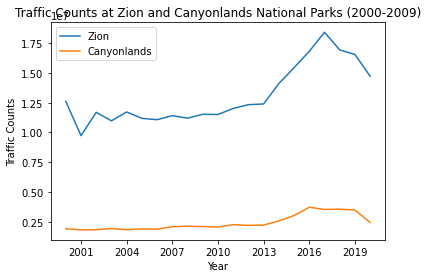

In [137]:
# Create the line graph
plt.plot(COMBINED_Traffic['Year'], COMBINED_Traffic['Zion_Traffic_Counts'], label='Zion')
plt.plot(COMBINED_Traffic['Year'], COMBINED_Traffic['CanyonLands_Traffic_Counts'], label='Canyonlands')
plt.xlabel('Year')
plt.ylabel('Traffic Counts')
plt.title('Traffic Counts at Zion and Canyonlands National Parks (2000-2009)')
plt.legend()

# remove the decimal place in the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Show the graph
plt.show()

In [56]:
#Visitation data for the two National Parks

#Convert the Year for Canyonlands to and integer
CL_VISITS['Year'].astype(str).astype(int)
#Drop years before 2000
CL_VISITS = CL_VISITS[CL_VISITS['Year'] >= 2000]
CL_VISITS.head()
#Drop 'TotalRecreationVisitors' because it is not relevant
CL_VISITS = CL_VISITS.drop(['TotalRecreationVisitors'], axis=1)
#Convert 'RecreationVisitors' to an integer and reanme  Column
CL_VISITS['RecreationVisitors'] = CL_VISITS['RecreationVisitors'].str.replace(',', '').astype(int)
CL_VISITS1 = CL_VISITS.rename(columns={'RecreationVisitors': 'Canyonlands_RecreationVisitors'})

#Convert the Year for Zion to and integer
ZN_VISITS['Year'].astype(str).astype(int)
#Drop years before 2000
ZN_VISITS = ZN_VISITS[ZN_VISITS['Year'] >= 2000]
#Drop 'TotalRecreationVisitors' because it is not relevant
ZN_VISITS = ZN_VISITS.drop(['TotalRecreationVisitors'], axis=1)
#Convert 'RecreationVisitors' to an integer and reanme  Column
ZN_VISITS['RecreationVisitors'] = ZN_VISITS['RecreationVisitors'].str.replace(',', '').astype(int)
ZN_VISITS1 = ZN_VISITS.rename(columns={'RecreationVisitors': 'Zion_RecreationVisitors'})

In [57]:
ZN_VISITS1.head()

,Year,Zion_RecreationVisitors
81,2000,2432348
82,2001,2217779
83,2002,2592545
84,2003,2458792
85,2004,2677342


In [58]:
ZN_VISITS2 = pd.DataFrame({
    'Year': ZN_VISITS1['Year'],
    'Zion_RecreationVisitors': ZN_VISITS1['Zion_RecreationVisitors'],
    'ABBR': 'ZION-DW'
})

# rename the last column
ZN_VISITS2 = ZN_VISITS2.rename(columns={'Zion_RecreationVisitors': 'Visitors'})

# print the new DataFrame
ZN_VISITS2.head()

,Year,Visitors,ABBR
81,2000,2432348,ZION-DW
82,2001,2217779,ZION-DW
83,2002,2592545,ZION-DW
84,2003,2458792,ZION-DW
85,2004,2677342,ZION-DW


In [59]:
CL_VISITS2 = pd.DataFrame({
    'Year': CL_VISITS1['Year'],
    'Canyonlands_RecreationVisitors': CL_VISITS1['Canyonlands_RecreationVisitors'],
    'ABBR': 'CANY-IS'
})

# rename the last column
CL_VISITS2 = CL_VISITS2.rename(columns={'Canyonlands_RecreationVisitors': 'Visitors'})

# print the new DataFrame
CL_VISITS2.head()

,Year,Visitors,ABBR
35,2000,401558,CANY-IS
36,2001,368592,CANY-IS
37,2002,367078,CANY-IS
38,2003,386986,CANY-IS
39,2004,371706,CANY-IS


In [60]:
# concatenate the two data frames
COMBINED_VISITS_NORMAL = pd.concat([CL_VISITS2, ZN_VISITS2])


COMBINED_VISITS_NORMAL['ID'] = range(1, len(COMBINED_VISITS_NORMAL) + 1)
COMBINED_VISITS_NORMAL = COMBINED_VISITS_NORMAL[['ID', 'ABBR','Year', 'Visitors']]

# print the new DataFrame
COMBINED_VISITS_NORMAL.head()

,ID,ABBR,Year,Visitors
35,1,CANY-IS,2000,401558
36,2,CANY-IS,2001,368592
37,3,CANY-IS,2002,367078
38,4,CANY-IS,2003,386986
39,5,CANY-IS,2004,371706


In [61]:
COMBINED_VISITS_NORMAL['ID'] = COMBINED_VISITS_NORMAL['ID'].astype(int)
COMBINED_VISITS_NORMAL['ABBR'] = COMBINED_VISITS_NORMAL['ABBR'].astype(str)
COMBINED_VISITS_NORMAL['Year'] = pd.to_datetime(COMBINED_VISITS_NORMAL['Year'], format='%Y')
COMBINED_VISITS_NORMAL['Visitors'] = COMBINED_VISITS_NORMAL['Visitors'].astype(int)
print(COMBINED_VISITS_NORMAL.dtypes)

ID                   int32
ABBR                object
Year        datetime64[ns]
Visitors             int32
dtype: object


In [ ]:
write_to_mysql(COMBINED_VISITS_NORMAL, endpoint, port, database_name, 'COMBINED_VISITS_NORMAL', username, password)

In [63]:
#Combine both of the Parks data into one
COMBINED_Park_Attendance = pd.merge(CL_VISITS1, ZN_VISITS1, on = ['Year'])
COMBINED_Park_Attendance.head(20)

,Year,Canyonlands_RecreationVisitors,Zion_RecreationVisitors
0,2000,401558,2432348
1,2001,368592,2217779
2,2002,367078,2592545
3,2003,386986,2458792
4,2004,371706,2677342
5,2005,393381,2586665
6,2006,392537,2567350
7,2007,417560,2657281
8,2008,436715,2690154
9,2009,436241,2735402


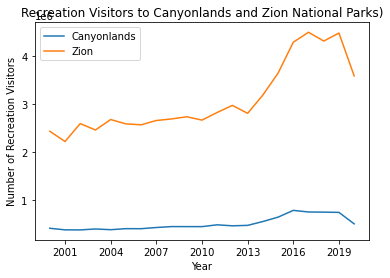

In [64]:
# create the line graph
plt.plot(COMBINED_Park_Attendance['Year'].astype(int), COMBINED_Park_Attendance['Canyonlands_RecreationVisitors'], label='Canyonlands')
plt.plot(COMBINED_Park_Attendance['Year'].astype(int), COMBINED_Park_Attendance['Zion_RecreationVisitors'], label='Zion')
plt.xlabel('Year')
plt.ylabel('Number of Recreation Visitors')
plt.title('Recreation Visitors to Canyonlands and Zion National Parks)')
plt.legend()


# remove the decimal place in the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# show the graph
plt.show()

In [65]:
#Look at StatePark data. I could not find csvs before 2017
print('Statepark visitiation file size')
print('FY 18:',STATE_PARK_VISITATION_FY18.shape)
print('FY 19:',STATE_PARK_VISITATION_FY19.shape)
print('FY 20:',STATE_PARK_VISITATION_FY20.shape)
print('FY 21:',STATE_PARK_VISITATION_FY21.shape)
STATE_PARK_VISITATION_FY18.head()

Statepark visitiation file size
FY 18: (42, 14)
FY 19: (43, 14)
FY 20: (43, 14)
FY 21: (44, 14)


,Park,July 2017,Aug 2017,Sept 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Total
0,Anasazi Indian Village State Park,1836.193743,1352.793759,3234.539020,1520.785799,1547.957847,106.958981,81.159234,152.069417,959.339219,2764.122733,3823.495893,2682.276842,20061.692486
1,Antelope Island State Park,54903.509536,51335.809540,43078.316638,25313.369430,44172.557854,21894.503477,26214.432446,26861.670248,47197.589897,52947.912670,49131.401319,52972.421800,496023.494855
2,Bear Lake State Park,116620.077709,72309.138047,32995.533549,879.611286,3385.454405,1850.390377,7947.112152,15091.283225,0.000000,1952.924134,22172.108884,62814.565184,338018.198951
3,Camp Floyd - Stage Coach Inn State Park,1488.805737,2123.665092,694.632168,342.627631,496.205919,152.951343,1107.011946,544.022983,684.940763,865.417529,1624.204386,2996.940298,13121.425795
4,Coral Pink Sand Dunes State Park,10853.089987,10011.276848,11213.203416,6887.616845,26228.319471,3613.074389,2378.506605,2889.318914,11118.414382,12472.439128,14592.835689,12442.953959,124701.049633


In [66]:
#Function will format the state data by dropping, stacking, and renaming of values
def format_state_data(df, y1, y2):  
    df = df.drop(['Total '], axis=1)
    df = df[df.Park != ' ']
    df = df[df.Park != 'Total']
    df.columns = range(6, 19)
    df2 = df.set_index([6]).stack().reset_index().rename(columns={6 : 'Park', 'level_1': 'Month', 0 :"Visitation"})
    df2['Year'] = 'fill'
    print(list(df2))
    df2.loc[df2['Month'] >= 13, ['Year']] = y2
    df2.replace('fill', y1, inplace=True)
    i = 1
    j= 13
    while i <= 6:
        df2['Month'].replace(j, i, inplace=True)
        i+=1
        j+=1
    return df2

#Call the function
temp1 = format_state_data(STATE_PARK_VISITATION_FY18, 2017, 2018)
temp2 = format_state_data(STATE_PARK_VISITATION_FY19, 2018, 2019)
temp3 = format_state_data(STATE_PARK_VISITATION_FY20, 2019, 2020)
temp4 = format_state_data(STATE_PARK_VISITATION_FY21, 2020, 2021)
temp4.head(10)

['Park', 'Month', 'Visitation', 'Year']
['Park', 'Month', 'Visitation', 'Year']
['Park', 'Month', 'Visitation', 'Year']
['Park', 'Month', 'Visitation', 'Year']


,Park,Month,Visitation,Year
0,Anasazi Indian Village State Park,7,"1,604",2020
1,Anasazi Indian Village State Park,8,973,2020
2,Anasazi Indian Village State Park,9,"1,536",2020
3,Anasazi Indian Village State Park,10,"3,385",2020
4,Anasazi Indian Village State Park,11,707,2020
5,Anasazi Indian Village State Park,12,428,2020
6,Anasazi Indian Village State Park,1,173,2021
7,Anasazi Indian Village State Park,2,207,2021
8,Anasazi Indian Village State Park,3,"1,140",2021
9,Anasazi Indian Village State Park,4,"2,875",2021


In [94]:
#Append data sets from above steps together
combo1 = temp1.append(temp2, ignore_index=True)
combo2 = combo1.append(temp3, ignore_index=True)
combo3 = combo2.append(temp4, ignore_index=True)
#Make sure data is before 2021
combo3 = combo3[combo3['Year'] <= 2020]
Combined_Park_Visitation_Monthly = combo3[['Park', 'Year', "Month", 'Visitation']]
Combined_Park_Visitation_Monthly.head()

,Park,Year,Month,Visitation
0,Anasazi Indian Village State Park,2017,7,1836.193743
1,Anasazi Indian Village State Park,2017,8,1352.793759
2,Anasazi Indian Village State Park,2017,9,3234.53902
3,Anasazi Indian Village State Park,2017,10,1520.785799
4,Anasazi Indian Village State Park,2017,11,1547.957847


In [95]:
Combined_Park_Visitation_Monthly['Visitation'] = pd.to_numeric(Combined_Park_Visitation_Monthly['Visitation'], errors='coerce')

# Drop rows containing non-finite values
Combined_Park_Visitation_Monthly = Combined_Park_Visitation_Monthly.dropna(subset=['Visitation'])

# Convert the column to integer
Combined_Park_Visitation_Monthly['Visitation'] = Combined_Park_Visitation_Monthly['Visitation'].astype(int)
Combined_Park_Visitation_Monthly.head()

,Park,Year,Month,Visitation
0,Anasazi Indian Village State Park,2017,7,1836
1,Anasazi Indian Village State Park,2017,8,1352
2,Anasazi Indian Village State Park,2017,9,3234
3,Anasazi Indian Village State Park,2017,10,1520
4,Anasazi Indian Village State Park,2017,11,1547


In [109]:
state_park_key = pd.DataFrame.from_dict(state_park_dict, orient='index', columns=['key'])
state_park_key.index.name = 'state_park_name'
state_park_key.reset_index(inplace=True)

state_park_key.head()

,state_park_name,key
0,Anasazi Indian Village State Park,0
1,Antelope Island State Park,1
2,Bear Lake State Park,2
3,Camp Floyd - Stage Coach Inn State Park,3
4,Coral Pink Sand Dunes State Park,4


In [110]:

parks = Combined_Park_Visitation_Monthly['Park'].unique()
state_park_dict = {park: i for i, park in enumerate(parks)}
print(state_park_dict)

{'Anasazi Indian Village State Park': 0, 'Antelope Island State Park': 1, 'Bear Lake State Park': 2, 'Camp Floyd - Stage Coach Inn State Park': 3, 'Coral Pink Sand Dunes State Park': 4, 'Dead Horse Point State Park': 5, 'Deer Creek State Park': 6, 'East Canyon State Park': 7, 'Edge Of The Cedars State Park': 8, 'Escalante Petrified Forest State Park': 9, 'Fremont Indian State Park': 10, 'Goblin Valley State Park': 11, 'Goosenecks State Park': 12, 'Great Salt Lake Marina State Park': 13, 'Green River State Park': 14, 'Gunlock State Park': 15, 'Huntington State Park': 16, 'Hyrum State Park': 17, 'Frontier State Park': 18, 'Jordanelle State Park': 19, 'Kodachrome Basin State Park': 20, 'Millsite State Park': 21, 'Jordan River OHV State Park': 22, 'Otter Creek State Park': 23, 'Palisade State Park': 24, 'Piute State Park': 25, 'Quail Creek State Park': 26, 'Red Fleet State Park': 27, 'Rockport State Park': 28, 'Sand Hollow State Park': 29, 'Scofield State Park': 30, 'Snow Canyon State Park

In [113]:
Combined_Park_Visitation_NORMAL = Combined_Park_Visitation_Monthly.copy()
Combined_Park_Visitation_NORMAL['Park'] = Combined_Park_Visitation_NORMAL['Park'].replace(state_park_dict)
Combined_Park_Visitation_NORMAL.head()

,ID,Park,Year,Month,Visitation
0,0,0,2017,7,1836
1,1,0,2017,8,1352
2,2,0,2017,9,3234
3,3,0,2017,10,1520
4,4,0,2017,11,1547


In [114]:
Combined_Park_Visitation_Monthly.reset_index(inplace=True)
Combined_Park_Visitation_Monthly.rename(columns={'index': 'ID'}, inplace=True)

# Reorder the columns with the ID column first
Combined_Park_Visitation_Monthly = Combined_Park_Visitation_Monthly[['ID', 'Park', 'Year', 'Month', 'Visitation']]
Combined_Park_Visitation_Monthly.head()

,ID,ID,Park,Year,Month,Visitation
0,0,0,Anasazi Indian Village State Park,2017,7,1836
1,1,1,Anasazi Indian Village State Park,2017,8,1352
2,2,2,Anasazi Indian Village State Park,2017,9,3234
3,3,3,Anasazi Indian Village State Park,2017,10,1520
4,4,4,Anasazi Indian Village State Park,2017,11,1547


In [115]:
state_park_key = pd.DataFrame.from_dict(state_park_dict, orient='index', columns=['key'])
state_park_key.index.name = 'state_park_name'
state_park_key.reset_index(inplace=True)

state_park_key.head()

,state_park_name,key
0,Anasazi Indian Village State Park,0
1,Antelope Island State Park,1
2,Bear Lake State Park,2
3,Camp Floyd - Stage Coach Inn State Park,3
4,Coral Pink Sand Dunes State Park,4


In [ ]:
write_to_mysql(state_park_key, endpoint, port, database_name, 'state_park_key', username, password)
write_to_mysql(Combined_Park_Visitation_Monthly, endpoint, port, database_name, 'Combined_Park_Visitation_Monthly', username, password)

In [118]:
#Drop Month column for better line up since National Park data is Yearly
Combined_Park_Visitation_Yearly = Combined_Park_Visitation_Monthly.drop(['Month'], axis=1)

Combined_Park_Visitation_Yearly = Combined_Park_Visitation_Yearly.groupby(['Park', "Year"]).sum('Visitation').reset_index()
Combined_Park_Visitation_Yearly = Combined_Park_Visitation_Yearly.sort_values('Year', ascending=True)
Combined_Park_Visitation_Yearly.head()

,Park,Year,ID,ID,Visitation
0,Anasazi Indian Village State Park,2017,15,15,9595
105,Scofield State Park,2017,2175,2175,11204
59,Huntington State Park,2017,1167,1167,19275
103,Sand Hollow State Park,2017,2103,2103,260144
99,Rockport State Park,2017,2031,2031,90834


In [131]:
Combined_Park_Visitation_Yearly = Combined_Park_Visitation_Yearly.drop(['ID'], axis=1)

Combined_Park_Visitation_Yearly.head()

,Park,Year,Visitation
0,Anasazi Indian Village State Park,2017,9595
105,Scofield State Park,2017,11204
59,Huntington State Park,2017,19275
103,Sand Hollow State Park,2017,260144
99,Rockport State Park,2017,90834


In [119]:
#Add Park column from Visits table
CL_VISITS['Park'] = 'CanyonLands'
ZN_VISITS['Park'] = 'Zion'
#append two tables
National_Park_Attendance = CL_VISITS.append(ZN_VISITS, ignore_index=True)
#Rename columns for better match (not neccessary I know, but I like it like like this its more clear)
National_Park_Attendance = National_Park_Attendance.rename(columns={'RecreationVisitors': 'Visitation'})
#choose column order and remove index column
National_Park_Attendance = National_Park_Attendance[['Park', 'Year', 'Visitation']]
#sort by year
National_Park_Attendance = National_Park_Attendance.sort_values('Year', ascending=True)
National_Park_Attendance.head()

,Park,Year,Visitation
0,CanyonLands,2000,401558
21,Zion,2000,2432348
1,CanyonLands,2001,368592
22,Zion,2001,2217779
2,CanyonLands,2002,367078


In [132]:
#add the national and state park data together
NationalandStatePark_Attendance = National_Park_Attendance.append(Combined_Park_Visitation_Yearly, ignore_index=True)
#sort alphabetically and by year
NationalandStatePark_Attendance = NationalandStatePark_Attendance.sort_values(['Park', "Year"], ascending=True)
#For some reason duplictes were coming in so just drop those
NationalandStatePark_Attendance = NationalandStatePark_Attendance.drop_duplicates()
#Since state park data starts in 2017 the national park data prior to that should be removed
NationalandStatePark_Attendance = NationalandStatePark_Attendance[NationalandStatePark_Attendance['Year'] >= 2017]
NationalandStatePark_Attendance.head(20)

,Park,Year,Visitation
42,Anasazi Indian Village State Park,2017,9595
119,Anasazi Indian Village State Park,2018,11157
138,Anasazi Indian Village State Park,2019,1684
152,Anasazi Indian Village State Park,2020,2837
80,Antelope Island State Park,2017,240695
114,Antelope Island State Park,2018,255322
70,Bear Lake State Park,2017,228038
111,Bear Lake State Park,2018,109976
81,Camp Floyd - Stage Coach Inn State Park,2017,5295
109,Camp Floyd - Stage Coach Inn State Park,2018,9615


In [138]:
#Add Traffic and attendance to the same table
Traffic_Attendance = pd.merge(COMBINED_Traffic, COMBINED_Park_Attendance, on = ['Year']).reset_index()
Traffic_Attendance = Traffic_Attendance[['Year', 'Zion_Traffic_Counts', "CanyonLands_Traffic_Counts",\
                                         'Zion_RecreationVisitors','Canyonlands_RecreationVisitors']]
Traffic_Attendance.head(20)

,Year,Zion_Traffic_Counts,CanyonLands_Traffic_Counts,Zion_RecreationVisitors,Canyonlands_RecreationVisitors
0,2000,12609012,1920828,2432348,401558
1,2001,9735264,1817868,2217779,368592
2,2002,11695500,1836624,2592545,367078
3,2003,10979160,1932180,2458792,386986
4,2004,11723076,1832436,2677342,371706
5,2005,11185872,1901220,2586665,393381
6,2006,11075748,1878672,2567350,392537
7,2007,11417760,2087472,2657281,417560
8,2008,11201664,2128740,2690154,436715
9,2009,11528280,2097684,2735402,436241


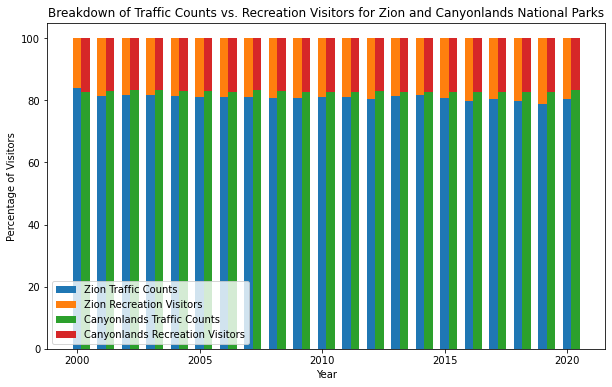

In [139]:
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Set x-axis values
years = Traffic_Attendance['Year']

# Set width of bars
width = 0.35

# Plot the data for Zion
zion_traffic = Traffic_Attendance['Zion_Traffic_Counts']
zion_recreation = Traffic_Attendance['Zion_RecreationVisitors']
zion_total = zion_traffic + zion_recreation
zion_traffic_pct = zion_traffic / zion_total * 100
zion_recreation_pct = zion_recreation / zion_total * 100
zion_traffic_bar = ax.bar(years, zion_traffic_pct, width, label='Zion Traffic Counts')
zion_recreation_bar = ax.bar(years, zion_recreation_pct, width, bottom=zion_traffic_pct, label='Zion Recreation Visitors')

# Plot the data for Canyonlands
canyonlands_traffic = Traffic_Attendance['CanyonLands_Traffic_Counts']
canyonlands_recreation = Traffic_Attendance['Canyonlands_RecreationVisitors']
canyonlands_total = canyonlands_traffic + canyonlands_recreation
canyonlands_traffic_pct = canyonlands_traffic / canyonlands_total * 100
canyonlands_recreation_pct = canyonlands_recreation / canyonlands_total * 100
canyonlands_traffic_bar = ax.bar(years + width, canyonlands_traffic_pct, width, label='Canyonlands Traffic Counts')
canyonlands_recreation_bar = ax.bar(years + width, canyonlands_recreation_pct, width, bottom=canyonlands_traffic_pct, label='Canyonlands Recreation Visitors')

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Visitors')
ax.set_title('Breakdown of Traffic Counts vs. Recreation Visitors for Zion and Canyonlands National Parks')
ax.legend()

# Show the plot
plt.show()

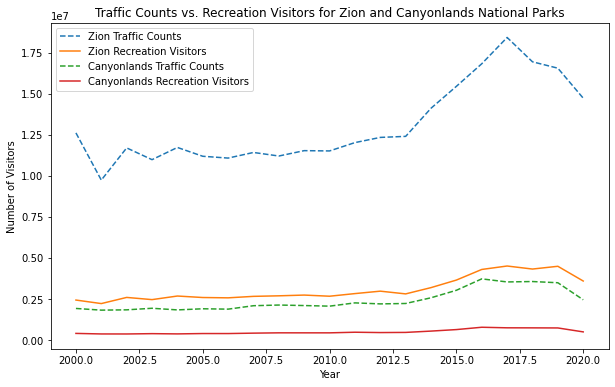

In [140]:
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Set x-axis values
years = Traffic_Attendance['Year']

# Plot the data for Zion
ax.plot(years, Traffic_Attendance['Zion_Traffic_Counts'], label='Zion Traffic Counts', linestyle='--')
ax.plot(years, Traffic_Attendance['Zion_RecreationVisitors'], label='Zion Recreation Visitors', linestyle='-')

# Plot the data for Canyonlands
ax.plot(years, Traffic_Attendance['CanyonLands_Traffic_Counts'], label='Canyonlands Traffic Counts', linestyle='--')
ax.plot(years, Traffic_Attendance['Canyonlands_RecreationVisitors'], label='Canyonlands Recreation Visitors', linestyle='-')

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of Visitors')
ax.set_title('Traffic Counts vs. Recreation Visitors for Zion and Canyonlands National Parks')
ax.legend()

# Show the plot
plt.show()

In [141]:
#Add RainFall and Temp data to the visitation and traffic counts
Zion_CanLan_Combined_Total_Data = pd.merge(Traffic_Attendance, COMBINED_Yearly_T_RF, on = ['Year']).reset_index()
Zion_CanLan_Combined_Total_Data = Zion_CanLan_Combined_Total_Data[['Year', 'Zion_Traffic_Counts', \
                                                                   "CanyonLands_Traffic_Counts",\
                                         'Zion_RecreationVisitors','Canyonlands_RecreationVisitors',\
                                          'Zion_Avg_Temp',  'Zion_Avg_Rainfall', 'CanyonLands_Avg_Temp', 'CanyonLands_Avg_Rainfall']]
Zion_CanLan_Combined_Total_Data.head(21)

,Year,Zion_Traffic_Counts,CanyonLands_Traffic_Counts,Zion_RecreationVisitors,Canyonlands_RecreationVisitors,Zion_Avg_Temp,Zion_Avg_Rainfall,CanyonLands_Avg_Temp,CanyonLands_Avg_Rainfall
0,2000,12609012,1920828,2432348,401558,NaN,NaN,24.267578,0.026902
1,2001,9735264,1817868,2217779,368592,NaN,NaN,24.704246,0.035060
2,2002,11695500,1836624,2592545,367078,NaN,NaN,24.870720,0.030330
3,2003,10979160,1932180,2458792,386986,NaN,NaN,25.903499,0.031826
4,2004,11723076,1832436,2677342,371706,24.562156,0.026146,25.741195,0.034138
5,2005,11185872,1901220,2586665,393381,24.689650,0.032967,24.152955,0.039063
6,2006,11075748,1878672,2567350,392537,24.757610,0.023523,24.122132,0.033382
7,2007,11417760,2087472,2657281,417560,25.743843,0.027321,23.709922,0.041688
8,2008,11201664,2128740,2690154,436715,24.652583,0.024426,24.757901,0.048555
9,2009,11528280,2097684,2735402,436241,24.247324,0.009301,24.926082,0.032804


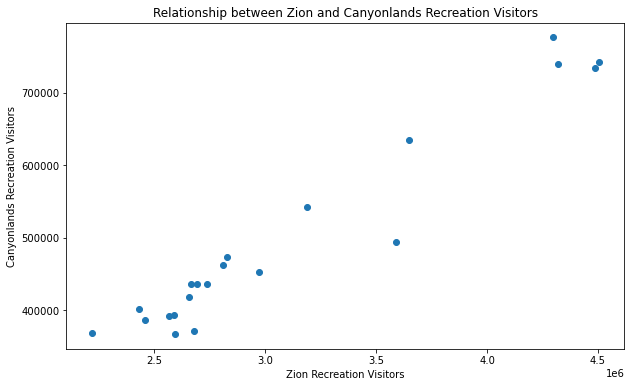

In [142]:
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data for Zion and Canyonlands recreation visitors
ax.scatter(Zion_CanLan_Combined_Total_Data['Zion_RecreationVisitors'], Zion_CanLan_Combined_Total_Data['Canyonlands_RecreationVisitors'])

# Add labels, title, and legend
ax.set_xlabel('Zion Recreation Visitors')
ax.set_ylabel('Canyonlands Recreation Visitors')
ax.set_title('Relationship between Zion and Canyonlands Recreation Visitors')

# Show the plot
plt.show()


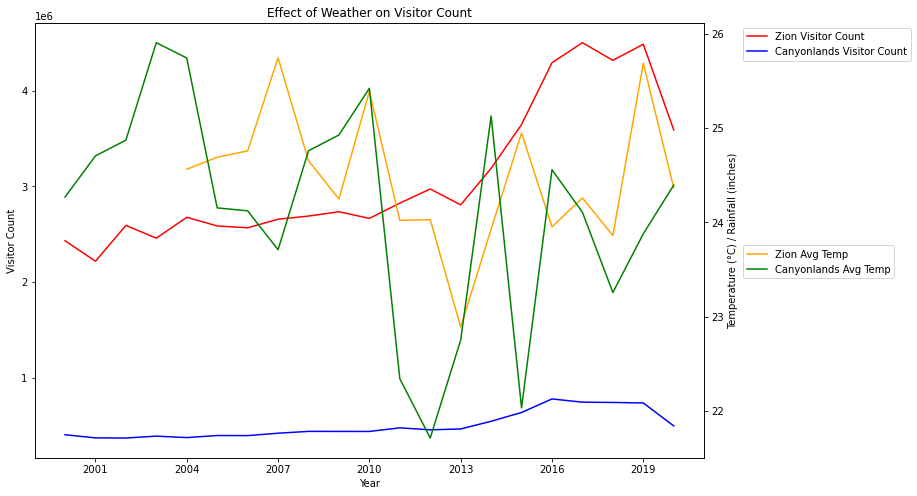

In [143]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# plot visitor count
ax1.plot(Zion_CanLan_Combined_Total_Data['Year'], Zion_CanLan_Combined_Total_Data['Zion_RecreationVisitors'], color='red')
ax1.plot(Zion_CanLan_Combined_Total_Data['Year'], Zion_CanLan_Combined_Total_Data['Canyonlands_RecreationVisitors'], color='blue')
ax1.set_ylabel('Visitor Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# create a second y-axis for temperature/rainfall
ax2 = ax1.twinx()

# plot temperature
ax2.plot(Zion_CanLan_Combined_Total_Data['Year'], Zion_CanLan_Combined_Total_Data['Zion_Avg_Temp'], color='orange')
ax2.plot(Zion_CanLan_Combined_Total_Data['Year'], Zion_CanLan_Combined_Total_Data['CanyonLands_Avg_Temp'], color='green')

# plot rainfall
ax2.set_ylabel('Temperature (°C) / Rainfall (inches)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# set x-axis label and title
ax1.set_xlabel('Year')
plt.title('Effect of Weather on Visitor Count')

# remove the decimal place in the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# add legend
ax1.legend(['Zion Visitor Count', 'Canyonlands Visitor Count'], loc='upper left', bbox_to_anchor=(1.05, 1))
ax2.legend(['Zion Avg Temp', 'Canyonlands Avg Temp', 'Zion Avg Rainfall', 'Canyonlands Avg Rainfall'], loc='upper left', bbox_to_anchor=(1.05, 0.5))

plt.show()
